# Bengaluru House Prices Prediction

# Q: Find out the R-Squared score for the Banguluru House Prices data using any Machine Learning Model and perform Exploratory Data Analysis on the data

# Given features of the data:
    area_type
    availability
    location
    size
    society
    total_sqft
    bath
    balcony
    price

# Tools Used:
    Pandas
    Numpy
    Matplotlib
    Seaborn
    Sklearn
    

In [1]:
#Importing the required tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
le = LabelEncoder()
norm = MinMaxScaler()
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Data Preparation

In [3]:
#no of rows and columns in the dataset
data.shape

(13320, 9)

we have total 13320 rows with 9 columns

In [4]:
#Column names
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# Finding Whetther the dataset contains the missing Values or not?

In [5]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Almost 40% of society data and 5% of balony data is missing

Hence majority of the data is not provided we are deleting this columns

In [6]:
#Deleting the society and balcony columns
data.drop(['society','balcony'],axis=1,inplace=True)

In [7]:
data.head()

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


Deleting the rows having Null values

In [8]:
data = data.dropna()
data

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [9]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

__Now the data is clean and free of null values.__

In [10]:
data.describe()

,bath,price
count,13246.000000,13246.000000
mean,2.692586,112.389392
std,1.341506,149.076587
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   size          13246 non-null  object 
 4   total_sqft    13246 non-null  object 
 5   bath          13246 non-null  float64
 6   price         13246 non-null  float64
dtypes: float64(2), object(5)
memory usage: 827.9+ KB


# Exploratory Data Analysis

In [12]:
data.tail()

,area_type,availability,location,size,total_sqft,bath,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,17.0


# Q1 In Which location the highest price building is?

In [13]:
data.sort_values('price',ascending = False).head(1)

,area_type,availability,location,size,total_sqft,bath,price
13067,Plot Area,Ready To Move,Defence Colony,10 Bedroom,7150,13.0,3600.0


The Highest Price is 3600 from the location Defence Colony

# Area Type

# Q2 From Which areatype we have more houses?

In [14]:
At = pd.DataFrame(data["area_type"].value_counts())
At

,area_type
Super built-up Area,8740
Built-up Area,2410
Plot Area,2009
Carpet Area,87


<AxesSubplot:>

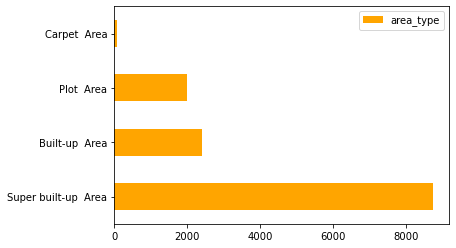

In [15]:
At.plot.barh(color = 'orange')

__Super built-up Area has the Highest of 8740 houses__

# Q3 Which is the Costliest areatype  with regarding house prices?

In [16]:
At1 = pd.DataFrame(data.groupby("area_type").mean()["price"])
At1

,price
area_type,
Built-up Area,103.988452
Carpet Area,89.502356
Plot Area,209.368148
Super built-up Area,92.641922


<AxesSubplot:xlabel='area_type'>

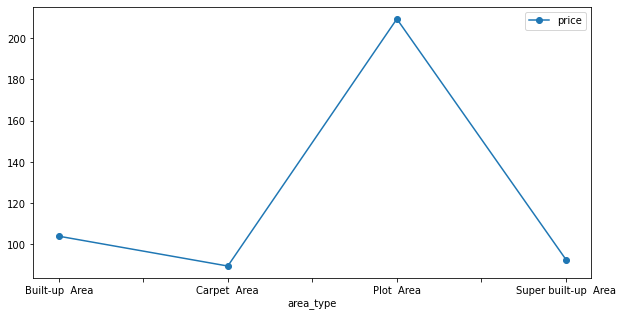

In [17]:
At1.plot(figsize=(10,5), marker='o')

__Plot Area type House will cost an average of 209 price__

# Q4 Find the Top 10 Locations Where the Building prices are High?

In [18]:
loc = pd.DataFrame(data.groupby("location").mean()["price"])
loc = loc.sort_values('price', ascending=False).iloc[:10]
loc

,price
location,
Cubbon Road,1900.000000
Ashok Nagar,1486.000000
Defence Colony,1167.714286
Yemlur,1093.388889
Church Street,1068.000000
D Souza Layout,1015.000000
Sadashiva Nagar,1011.100000
Sindhi Colony,988.000000
Srinivas Colony,922.000000


<AxesSubplot:ylabel='location'>

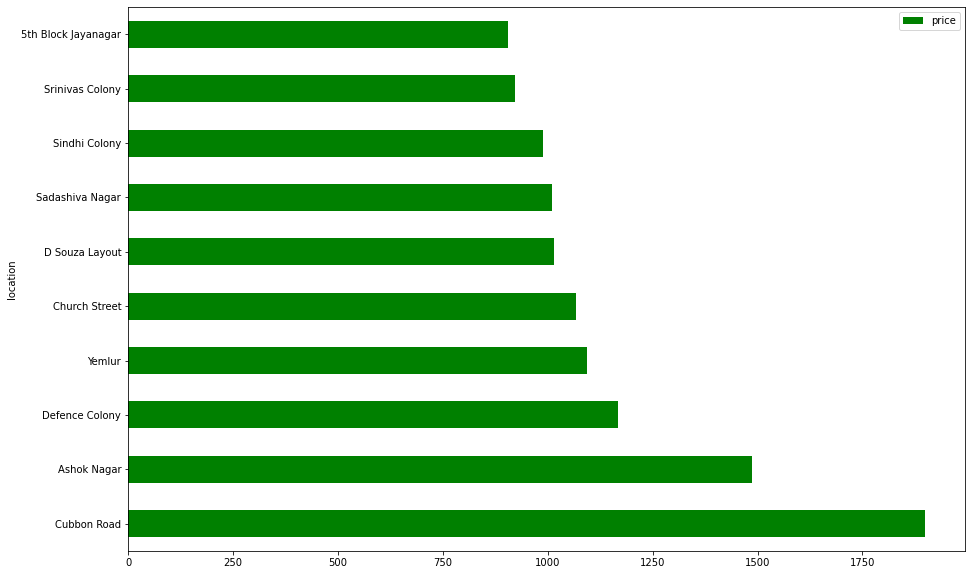

In [19]:
loc.plot.barh(figsize=(15,10),color='green')

In [20]:
loc.index

Index(['Cubbon Road', 'Ashok Nagar', 'Defence Colony', 'Yemlur',
       'Church Street', 'D Souza Layout', 'Sadashiva Nagar', 'Sindhi Colony',
       'Srinivas Colony', '5th Block Jayanagar'],
      dtype='object', name='location')

These are the Top 10 Locations having High Building prices
__'Cubbon Road', 
'Ashok Nagar', 
'Defence Colony', 
'Yemlur',
'Church Street', 
'D Souza Layout', 
'Sadashiva Nagar', 
'Sindhi Colony',
'Srinivas Colony', 
'5th Block Jayanagar'__

# Q5 What is the most demanded House size in Bangalore from the data?

In [21]:
data['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

__Here the data is taken as BHK and Bedroom but in reality both comes under same category__

So Considering the values BHK and bedrroom into single value.

In [22]:
data['size'].replace({"1 Bedroom":"1 BHK"},inplace = True)
data['size'].replace({"2 Bedroom":"2 BHK"},inplace = True)
data['size'].replace({"3 Bedroom":"3 BHK"},inplace = True)
data['size'].replace({"4 Bedroom":"4 BHK"},inplace = True)
data['size'].replace({"5 Bedroom":"5 BHK"},inplace = True)
data['size'].replace({"6 Bedroom":"6 BHK"},inplace = True)
data['size'].replace({"7 Bedroom":"7 BHK"},inplace = True)
data['size'].replace({"8 Bedroom":"8 BHK"},inplace = True)
data['size'].replace({"9 Bedroom":"9 BHK"},inplace = True)
data['size'].replace({"10 Bedroom":"10 BHK"},inplace = True)
data['size'].replace({"11 Bedroom":"11 BHK"},inplace = True)
data['size'].replace({"12 Bedroom":"12 BHK"},inplace = True)
data['size'].replace({"18 Bedroom":"18 BHK"},inplace = True)

data['size'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


2 BHK         5527
3 BHK         4832
4 BHK         1395
1 BHK          636
5 BHK          353
6 BHK          221
7 BHK          100
8 BHK           89
9 BHK           54
10 BHK          14
1 RK            13
11 BHK           4
27 BHK           1
19 BHK           1
16 BHK           1
43 Bedroom       1
14 BHK           1
12 BHK           1
13 BHK           1
18 BHK           1
Name: size, dtype: int64

In [23]:
Size = pd.DataFrame(data.groupby("size").sum()["price"])
Size

,price
size,
1 BHK,28679.850
1 RK,365.590
10 BHK,7420.000
11 BHK,830.000
12 BHK,300.000
13 BHK,275.000
14 BHK,125.000
16 BHK,550.000
18 BHK,200.000


<AxesSubplot:xlabel='size'>

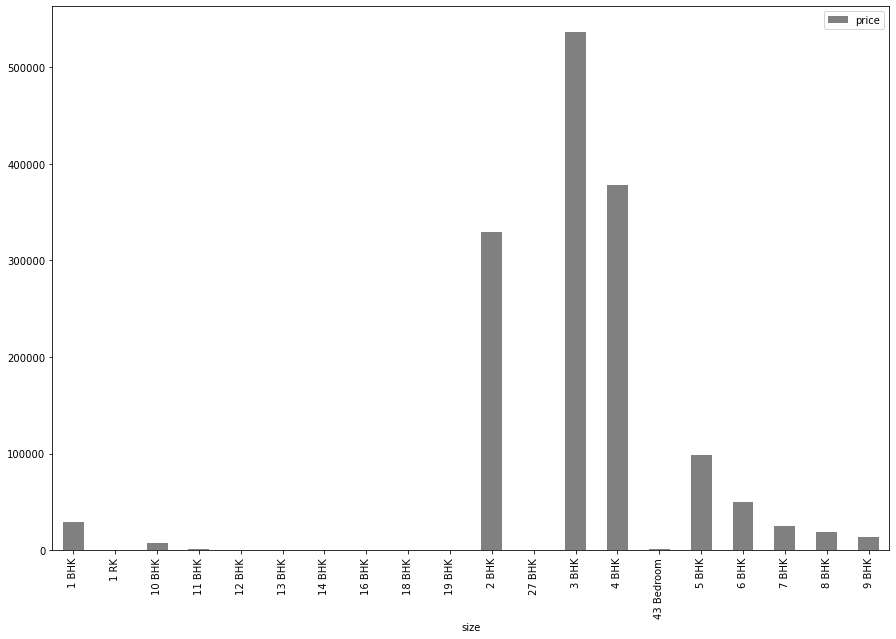

In [24]:
Size.plot.bar(figsize=(15,10), color="grey")

__3BHK size Houses are the most demanded houses in Bangalore.__

# Q6 In Which Location the Building price is low and is available for Ready to move?

In [25]:
d1 = data[data["availability"]=="Ready To Move"]
d1[d1["price"]==min(d1["price"])]

,area_type,availability,location,size,total_sqft,bath,price
10526,Super built-up Area,Ready To Move,Yelahanka New Town,1 BHK,284,1.0,8.0


__In Yelahanka New Town we have a Building price 8.0 and is Ready to Move.__

# Q7 Find the dates of Availability for the Houses in  Whitefield locality with size 1BHK?

In [26]:
Doa = data[(data["location"]=="Whitefield") & (data['size']=="1 BHK")]
Doa

,area_type,availability,location,size,total_sqft,bath,price
2094,Super built-up Area,18-Apr,Whitefield,1 BHK,950,1.0,50.000
2166,Super built-up Area,Ready To Move,Whitefield,1 BHK,825,1.0,45.000
3224,Built-up Area,18-Jun,Whitefield,1 BHK,905,1.0,55.000
3364,Super built-up Area,19-Dec,Whitefield,1 BHK,613 - 648,1.0,32.790
4226,Super built-up Area,19-Dec,Whitefield,1 BHK,524 - 894,1.0,34.385
4541,Built-up Area,18-Dec,Whitefield,1 BHK,624,1.0,35.000
5044,Super built-up Area,Ready To Move,Whitefield,1 BHK,650,1.0,25.000
5174,Built-up Area,Ready To Move,Whitefield,1 BHK,810,1.0,21.000
5382,Super built-up Area,19-Dec,Whitefield,1 BHK,524 - 894,1.0,34.735
5470,Super built-up Area,Ready To Move,Whitefield,1 BHK,825,1.0,44.900


In [27]:
Doa[["location","size","availability","price"]]

,location,size,availability,price
2094,Whitefield,1 BHK,18-Apr,50.000
2166,Whitefield,1 BHK,Ready To Move,45.000
3224,Whitefield,1 BHK,18-Jun,55.000
3364,Whitefield,1 BHK,19-Dec,32.790
4226,Whitefield,1 BHK,19-Dec,34.385
4541,Whitefield,1 BHK,18-Dec,35.000
5044,Whitefield,1 BHK,Ready To Move,25.000
5174,Whitefield,1 BHK,Ready To Move,21.000
5382,Whitefield,1 BHK,19-Dec,34.735
5470,Whitefield,1 BHK,Ready To Move,44.900


# You can select the date and also check the prices of the buildings in Whitefield location of 1BHK size.

# Machine Learning

In [28]:
data

,area_type,availability,location,size,total_sqft,bath,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,2600,5.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 BHK,3453,4.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [29]:
#Checking the null values
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [30]:
data.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
price           float64
dtype: object

# Label Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
# Taking the non-numeic columns into a list
object_col = data.select_dtypes(object).columns
object_col

Index(['area_type', 'availability', 'location', 'size', 'total_sqft'], dtype='object')

In [33]:
#Coverting the non-numeric data into numric data
for i in object_col:
    data[i]= le.fit_transform(data[i])

C:\Users\HP\AppData\Local\Temp/ipykernel_14740/2874110015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= le.fit_transform(data[i])


In [34]:
data

,area_type,availability,location,size,total_sqft,bath,price
0,3,40,419,10,69,2.0,39.07
1,2,79,317,13,1257,5.0,120.00
2,0,79,1178,12,505,2.0,62.00
3,3,79,756,12,586,3.0,95.00
4,3,79,715,10,237,2.0,51.00
...,...,...,...,...,...,...,...
13315,0,79,1251,15,1460,4.0,231.00
13316,3,79,1003,13,1494,5.0,400.00
13317,0,79,971,10,170,2.0,60.00
13318,3,32,906,13,1634,4.0,488.00


In [35]:
#Initailize the data
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X)
print(y)

       area_type  availability  location  size  total_sqft  bath
0              3            40       419    10          69   2.0
1              2            79       317    13        1257   5.0
2              0            79      1178    12         505   2.0
3              3            79       756    12         586   3.0
4              3            79       715    10         237   2.0
...          ...           ...       ...   ...         ...   ...
13315          0            79      1251    15        1460   4.0
13316          3            79      1003    13        1494   5.0
13317          0            79       971    10         170   2.0
13318          3            32       906    13        1634   4.0
13319          3            79       396     0        1701   1.0

[13246 rows x 6 columns]
0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Lengt

# Normalization

In [36]:
# Importing the Normalization 
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()

In [37]:
# Normalizing the independent data 
X_norm  = norm.fit_transform(X)
X = pd.DataFrame(X_norm,columns=X.columns)
X

,area_type,availability,location,size,total_sqft,bath
0,1.000000,0.506329,0.321566,0.526316,0.033398,0.025641
1,0.666667,1.000000,0.243285,0.684211,0.608422,0.102564
2,0.000000,1.000000,0.904068,0.631579,0.244434,0.025641
3,1.000000,1.000000,0.580200,0.631579,0.283640,0.051282
4,1.000000,1.000000,0.548734,0.526316,0.114714,0.025641
...,...,...,...,...,...,...
13241,0.000000,1.000000,0.960092,0.789474,0.706680,0.076923
13242,1.000000,1.000000,0.769762,0.684211,0.723136,0.102564
13243,0.000000,1.000000,0.745203,0.526316,0.082285,0.025641
13244,1.000000,0.405063,0.695318,0.684211,0.790900,0.076923


# Train_Test_Split

In [38]:
#Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(13246, 6)
(9272, 6)
(3974, 6)


70% of the data is splited into training data and 30% od the data is splitted into test data

# RandomForestRegressor

In [40]:
RF = RandomForestRegressor(n_estimators=21,random_state=42)

In [41]:
#Fitting the data into the model
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=21, random_state=42)

In [42]:
#Predicting the data
y_pred = RF.predict(X_test)
y_pred[:5]

array([188.33333333,  53.53904762,  87.1629305 ,  45.52968254,
       125.57095238])

In [43]:
#Orginal test data
np.array(y_test[:5])

array([140.  ,  45.95,  85.  ,  65.  ,  97.  ])

In [44]:
# Checking the R2 Score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,y_pred)

0.40998013956431345

In [45]:
print("Mean Absolute Error is =",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error is =",mean_squared_error(y_test,y_pred))
print("R2 Score is =",r2_score(y_test,y_pred))

Mean Absolute Error is = 36.33028311647038
Mean Squared Error is = 8278.747768171994
R2 Score is = 0.40998013956431345


# So by taking the Bengaluru Building Prices dataset we got the values
Mean Absolute Error is = 36.33028311647038

Mean Squared Error is = 8278.747768171994

R2 Score is = 0.40998013956431345